<div align="center">

# **Assignment 1**

</div>

---

# PyTorch Foundations & Neural Network Inference


---

# 🎯 Objective

The goal of this assignment is to:

* Become comfortable with `torch.Tensor`
* Understand tensor operations and shapes
* Implement a simple linear model (forward pass only)
* Perform inference using a pretrained deep network
* Learn correct model evaluation procedure

This assignment focuses on **understanding computation**, not training.


---

# 📌 General Requirements

* Use **PyTorch**
* Submit a **Jupyter Notebook (.ipynb)**
* Notebook must:
  * Run from top to bottom without errors
  * Contain markdown explanations
  * Include plots where required
* Set random seed
* Use clear variable names

No training loops allowed in this assignment.


---

In [18]:
import torch

torch.manual_seed(42)

# Task 1 — Tensor Mechanics (3pts)

### Part A — Basic Operations


1. Create tensors:
   * zeros
   * ones
   * random normal
   * random uniform
2. Perform and demonstrate:
   * elementwise multiplication
   * matrix multiplication
   * broadcasting
   * reshaping
   * transpose
   * concatenation
3. Show examples of incorrect shape operations and explain why they fail.


---

In [19]:
# =========================
# PART A
# =========================

# 1. Create tensors
tensor_zeros = torch.zeros(10)
tensor_ones = torch.ones(10)
tensor_random_normal = torch.randn(10)
tensor_random_uniform = torch.rand(10)

print("Zeros:\n", tensor_zeros)
print("Ones:\n", tensor_ones)
print("Random normal:\n", tensor_random_normal)
print("Random uniform:\n", tensor_random_uniform, "\n")

# Create matrices for further operations
A = torch.randn(2, 3)
B = torch.randn(2, 3)
C = torch.randn(3, 4)

print("Matrix A:\n", A)
print("Matrix B:\n", B)
print("Matrix C:\n", C, "\n")

# 2. Operations

# Elementwise multiplication
elementwise = A * B
print("Elementwise multiplication A * B:\n", elementwise, "\n")

# Matrix multiplication
matmul = torch.matmul(A, C)
print("Matrix multiplication A @ C:\n", matmul, "\n")

# Broadcasting
vector = torch.randn(3)
broadcast_result = A + vector
print("Broadcasting A + vector:\n", broadcast_result, "\n")

# Reshaping
reshaped = A.reshape(3, 2)
print("Reshaped A (3x2):\n", reshaped, "\n")

# Transpose
transpose = A.T
print("Transpose of A:\n", transpose, "\n")

# Concatenation
concat_dim0 = torch.cat([A, B], dim=0)
concat_dim1 = torch.cat([A, B], dim=1)
print("Concatenation dim=0:\n", concat_dim0)
print("Concatenation dim=1:\n", concat_dim1, "\n")

# 3. Incorrect shape operations

# Example 1 - matrix multiplication shape mismatch
try:
    wrong = torch.matmul(A, B)
except RuntimeError as e:
    print("Matrix multiplication error (A @ B):")
    print(e, "\n")

# Example 2 - incompatible broadcasting
try:
    wrong_broadcast = A + torch.randn(4)
except RuntimeError as e:
    print("Broadcasting error:")
    print(e, "\n")

Zeros:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Ones:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Random normal:
 tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
         0.4617,  0.2674])
Random uniform:
 tensor([0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994, 0.5472,
        0.0062]) 

Matrix A:
 tensor([[-0.3267, -0.2788, -0.4220],
        [-1.3323, -0.3639,  0.1513]])
Matrix B:
 tensor([[-0.3514, -0.7906, -0.0915],
        [ 0.2352,  2.2440,  0.5817]])
Matrix C:
 tensor([[ 0.4528,  0.6410,  0.5200,  0.5567],
        [ 0.0744,  0.7113, -0.5687,  1.2580],
        [-1.5890, -1.1208,  0.8423,  0.1744]]) 

Elementwise multiplication A * B:
 tensor([[ 0.1148,  0.2204,  0.0386],
        [-0.3133, -0.8167,  0.0880]]) 

Matrix multiplication A @ C:
 tensor([[ 0.5018,  0.0652, -0.3668, -0.6062],
        [-0.8708, -1.2825, -0.3583, -1.1732]]) 

Broadcasting A + vector:
 tensor([[-2.4523,  0.6841,  0.3376],
        [-3.4579,  0.599

### Part B — Manual Linear Algebra

Implement manually (without using `torch.matmul` for part of it):

* Dot product
* Matrix-vector multiplication
* Batch matrix multiplication

Then verify correctness using built-in PyTorch functions.


---

In [20]:
def manual_dot(x, y):
    result = 0.0
    for i in range(len(x)):
        result += x[i] * y[i]
    return result

x = torch.randn(5)
y = torch.randn(5)

manual_result = manual_dot(x, y)
torch_result = torch.dot(x, y)

print("Manual dot:", manual_result)
print("Torch dot:", torch_result)

def manual_matvec(A, v):
    m, n = A.shape
    result = torch.zeros(m)
    for i in range(m):
        for j in range(n):
            result[i] += A[i, j] * v[j]
    return result

A = torch.randn(3, 4)
v = torch.randn(4)

manual_mv = manual_matvec(A, v)
torch_mv = torch.matmul(A, v)

print("Manual matvec:\n", manual_mv)
print("Torch matvec:\n", torch_mv)

def manual_batch_matmul(A, B):
    batch, m, n = A.shape
    _, _, k = B.shape
    
    result = torch.zeros(batch, m, k)
    
    for b in range(batch):
        for i in range(m):
            for j in range(k):
                for t in range(n):
                    result[b, i, j] += A[b, i, t] * B[b, t, j]
    return result

A = torch.randn(2, 3, 4)
B = torch.randn(2, 4, 5)

manual_batch = manual_batch_matmul(A, B)
torch_batch = torch.matmul(A, B)

print("Manual batch matmul:\n", manual_batch)
print("Torch batch matmul:\n", torch_batch)

print("Difference:", torch.norm(manual_batch - torch_batch))

Manual dot: tensor(0.0873)
Torch dot: tensor(0.0873)
Manual matvec:
 tensor([ 0.2268, -1.5308,  1.1255])
Torch matvec:
 tensor([ 0.2268, -1.5308,  1.1255])
Manual batch matmul:
 tensor([[[-3.6646,  1.1662, -3.0366, -1.7599, -0.1492],
         [ 0.1116,  0.6303, -0.0567, -0.2077,  1.0837],
         [-1.3278,  1.2752, -0.6710,  0.7909, -0.3541]],

        [[ 0.7447,  0.0538,  0.4204,  0.2133, -0.5938],
         [ 0.5220, -0.3910,  2.3961,  3.3551, -1.8512],
         [-0.5132, -0.8389,  0.8204,  3.6301, -1.8482]]])
Torch batch matmul:
 tensor([[[-3.6646,  1.1662, -3.0366, -1.7599, -0.1492],
         [ 0.1116,  0.6303, -0.0567, -0.2077,  1.0837],
         [-1.3278,  1.2752, -0.6710,  0.7909, -0.3541]],

        [[ 0.7447,  0.0538,  0.4204,  0.2133, -0.5938],
         [ 0.5220, -0.3910,  2.3961,  3.3551, -1.8512],
         [-0.5132, -0.8389,  0.8204,  3.6301, -1.8482]]])
Difference: tensor(0.)


### Required Explanation (Markdown)

Explain:

* Difference between elementwise and matrix multiplication.
* Broadcasting rules in PyTorch.
* Computational complexity of multiplying an n×mn \\times mn×m matrix with an m×km \\times km×k matrix.


---

- There is a big difference between those operation one just multiply the matrices of the same sizes and the operetion looks like it multiply only the elements of according indecies
- The Fundamental Rules of Broadcasting Two tensors are "broadcastable" if the following conditions are met:
Each tensor has at least one dimension.
Iterating backward, starting from the trailing (rightmost) dimensions:
The dimension sizes are equal, OR
One of the dimensions is 1, OR
One of the dimensions does not exist. 
If these conditions are not met, PyTorch will raise a RuntimeError

- The cost is n * m * k cuz we have A size nxm and B size mxk time to compute each elemnt is m and we have result matirx C = AB size of nxk so the time is n * m * k




# Task 2 — Simple Linear Model (Forward Pass Only) (3pts)

We consider the model:

$$
y = Wx+b
$$


---

### Requirements:


1. Generate synthetic dataset:
   * 100 data points
   * 1D input → 1D output
   * Add small Gaussian noise
2. Initialize:
   * `W` randomly
   * `b` randomly
3. Compute:
   * Predictions
   * Mean Squared Error manually
4. Plot:
   * Data points
   * Model predictions


---

### Important Restrictions:

* No `torch.nn.Linear`


---

W: -0.5671805739402771 b: -0.5706474184989929
Manual MSE: 80.22706604003906


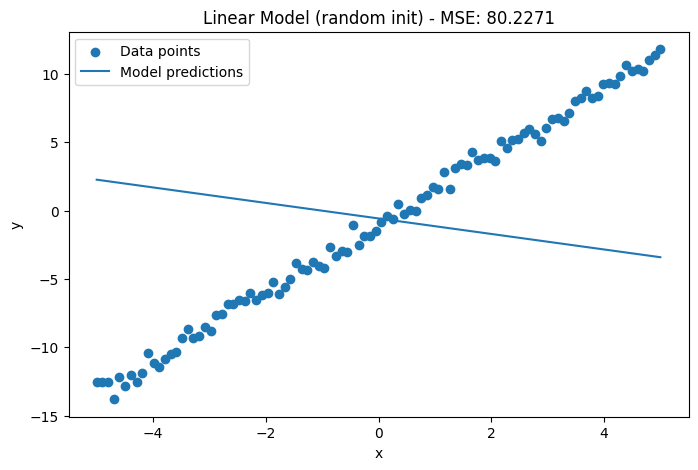

In [21]:
import torch
import matplotlib.pyplot as plt

# 1) Synthetic dataset: 100 points, 1D -> 1D, small Gaussian noise
torch.manual_seed(42)
n = 100
x = torch.linspace(-5, 5, n).unsqueeze(1)  # (100, 1)

true_W = torch.tensor([[2.5]])
true_b = torch.tensor([[-1.0]])
noise = 0.5 * torch.randn(n, 1)
y = x @ true_W + true_b + noise  # y = Wx + b + noise

# 2) Random init W and b
W = torch.randn(1, 1)
b = torch.randn(1)  # broadcast to (100,1) in expression below

# 3) Predictions + manual MSE
y_pred = x @ W + b
mse = ((y_pred - y) ** 2).mean()  # manual MSE (no nn.MSELoss)

print("W:", W.item(), "b:", b.item())
print("Manual MSE:", mse.item())

# 4) Plot points + model prediction line
plt.figure(figsize=(8, 5))
plt.scatter(x.numpy(), y.numpy(), label="Data points")
plt.plot(x.numpy(), y_pred.detach().numpy(), label="Model predictions")
plt.title(f"Linear Model (random init) - MSE: {mse.item():.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Required Explanation:

* What does the weight represent geometrically?
* What does the bias represent?
* Why does random initialization produce poor predictions?


---

- Weight represent slope geometrically.
- The bias represent the move according to y axis.
- LMAO, because it have to guess right numbers to fit into a data. I mean this example is very simple and we are only trying to guess the slope of the line and the starting point as b in linear function. 

---

# 🟢 Task 3 — Pretrained Model Inference (4pts)

Now you will use a real deep neural network.


---

### Step 1 — Load Model

* Load pretrained `ResNet18` from `torchvision.models`
* Set `model.eval()`


---

### Step 2 — Image Preprocessing

* Load 3–5 images
* Apply correct transforms:
  * Resize
  * Center crop
  * To tensor
  * Normalization (ImageNet mean/std)


---

### Step 3 — Inference

* Run forward pass
* Extract top-5 predicted classes
* Print class names and probabilities


---

### Step 4 — Experiment

Run inference:


1. With correct normalization
2. Without normalization

Compare results.


---

In [38]:
from torchvision.models import ResNet18_Weights

weights = ResNet18_Weights.DEFAULT
print( weights.transforms())

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)



===== WITH correct ImageNet normalization =====

Image: cat.jpg
  Top-1: Persian cat                prob=0.4696
  Top-2: lynx                       prob=0.3827
  Top-3: tiger cat                  prob=0.0626
  Top-4: tabby                      prob=0.0506
  Top-5: Egyptian cat               prob=0.0100

Image: husky.jpg
  Top-1: Eskimo dog                 prob=0.5420
  Top-2: Siberian husky             prob=0.2310
  Top-3: malamute                   prob=0.1841
  Top-4: timber wolf                prob=0.0101
  Top-5: dogsled                    prob=0.0080

Image: bmw.jpg
  Top-1: sports car                 prob=0.5891
  Top-2: racer                      prob=0.1967
  Top-3: beach wagon                prob=0.0581
  Top-4: car wheel                  prob=0.0411
  Top-5: limousine                  prob=0.0304

Image: house.jpg
  Top-1: boathouse                  prob=0.4549
  Top-2: picket fence               prob=0.2106
  Top-3: thatch                     prob=0.1418
  Top-4: mobile hom

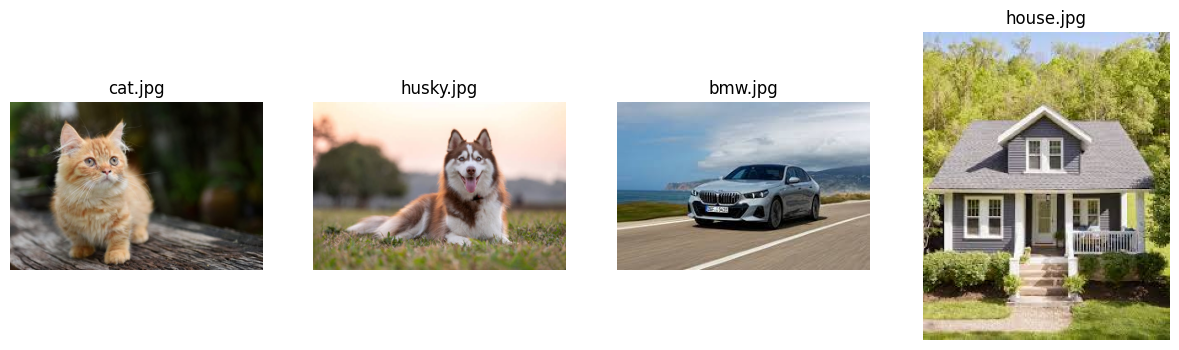

In [ ]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# -------------------------
# Step 1 — Load Model
# -------------------------
weights = ResNet18_Weights.DEFAULT
model = models.resnet18(weights=weights)
model.eval()

# ImageNet class names (1000 labels)
categories = weights.meta["categories"]

# -------------------------
# Step 2 — Image Preprocessing
# -------------------------
weights.transforms['mean']
IMAGENET_MEAN = (0.485, 0.456, 0.406) # Values found in weights.transforms()
IMAGENET_STD  = (0.229, 0.224, 0.225)

transform_correct = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD),
])

transform_no_norm = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  # brak Normalize
])

image_paths = [
    "cat.jpg",
    "husky.jpg",
    "bmw.jpg",
    "house.jpg",

]

def load_batch(paths, tfm):
    imgs = []
    for p in paths:
        img = Image.open(p).convert("RGB")
        imgs.append(tfm(img))
    return torch.stack(imgs, dim=0)  # (N, 3, 224, 224)

def top5_from_logits(logits):
    probs = F.softmax(logits, dim=1)            # (N,1000)
    top_probs, top_idxs = torch.topk(probs, 5)  # (N,5)
    return top_probs, top_idxs

def run_inference(title, tfm):
    batch = load_batch(image_paths, tfm)

    with torch.no_grad():
        logits = model(batch)  # (N, 1000) - to są logity

    top_probs, top_idxs = top5_from_logits(logits)

    print(f"\n===== {title} =====")
    for i, path in enumerate(image_paths):
        print(f"\nImage: {path}")
        for r in range(5):
            cls_idx = top_idxs[i, r].item()
            cls_name = categories[cls_idx]
            prob = top_probs[i, r].item()
            print(f"  Top-{r+1}: {cls_name:25s}  prob={prob:.4f}")

# -------------------------
# Step 3 + Step 4 — Inference + Experiment
# -------------------------
run_inference("WITH correct ImageNet normalization", transform_correct)
run_inference("WITHOUT normalization", transform_no_norm)

# Podgląd obrazów
fig, axes = plt.subplots(1, min(len(image_paths), 5), figsize=(15, 4))
if len(image_paths) == 1:
    axes = [axes]
for ax, p in zip(axes, image_paths[:5]):
    ax.imshow(Image.open(p).convert("RGB"))
    ax.set_title(p)
    ax.axis("off")
plt.show()


### Required Explanation

In markdown, answer:


1. Why do we call `model.eval()`?
2. What happens if normalization is skipped?
3. What is a logit?
4. Why do we apply softmax for probabilities?

1. model.eval() switches to (evaluation mode) it does that every layer is used. Disables dropout, no randomization.
2. If normalization is skipped then something like shift occurs
3. A logit is: logit(p) = log(p / (1 - p)). It is how much model belives its this class
4. Because logits doesn't sum to 1, so therefore it cannot be a probabilty that's why softmax came inhandy and helps us to get this property